# Install dependencies

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [6]:
df= pd.read_csv('covid-19.csv')

# Overview of Dataset

In [7]:
df.head()

,Date,Cured,Deaths,Confirmed
0,3/2/2020,0.0,0.0,1.0
1,3/3/2020,0.0,0.0,1.0
2,3/4/2020,0.0,0.0,1.0
3,3/5/2020,0.0,0.0,2.0
4,3/6/2020,0.0,0.0,3.0


In [8]:
df.tail()

,Date,Cured,Deaths,Confirmed
736,3/8/2022,1423097.143,25405.00000,1448667.714
737,3/9/2022,1423153.714,25406.60714,1448724.214
738,3/10/2022,1423210.286,25408.21429,1448780.714
739,3/11/2022,1423266.857,25409.82143,1448837.214
740,3/12/2022,1423323.429,25411.42857,1448893.714


# Observe the Information of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       741 non-null    object 
 1   Cured      741 non-null    float64
 2   Deaths     741 non-null    float64
 3   Confirmed  741 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.3+ KB


# Compute the Standard Daviation, Mean, Count, Min and Max Values

In [10]:
df.describe()
# 25% data is less thn 903

,Cured,Deaths,Confirmed
count,7.410000e+02,741.000000,7.410000e+02
mean,7.763974e+05,13926.642664,8.023839e+05
std,5.784675e+05,9951.520111,5.849880e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,1.585860e+05,4481.000000,1.795690e+05
50%,6.281170e+05,10919.000000,6.408150e+05
75%,1.412858e+06,25114.107140,1.438441e+06
max,1.423323e+06,25411.428570,1.448894e+06


# Compute the Correlation of Dataset

In [157]:
df.corr()

,Cured,Deaths,Confirmed,forecast
Cured,1.000000,0.997435,0.999476,0.981325
Deaths,0.997435,1.000000,0.995938,0.981579
Confirmed,0.999476,0.995938,1.000000,0.981480
forecast,0.981325,0.981579,0.981480,1.000000


# Get the Names of Columns

In [11]:
df.columns

Index(['Date', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

# Observe the shape of Dataset

In [12]:
df.shape

(741, 4)

# Check for Any Null Entries

In [13]:
df.isnull().any()

Date         False
Cured        False
Deaths       False
Confirmed    False
dtype: bool

# Set Date as Index

In [16]:
df.set_index('Date', inplace=True)

In [17]:
df.head()

,Cured,Deaths,Confirmed
Date,,,
3/2/2020,0.0,0.0,1.0
3/3/2020,0.0,0.0,1.0
3/4/2020,0.0,0.0,1.0
3/5/2020,0.0,0.0,2.0
3/6/2020,0.0,0.0,3.0


# Recheck if any null entry extist

In [18]:
df.isnull()

,Cured,Deaths,Confirmed
Date,,,
3/2/2020,False,False,False
3/3/2020,False,False,False
3/4/2020,False,False,False
3/5/2020,False,False,False
3/6/2020,False,False,False
...,...,...,...
3/8/2022,False,False,False
3/9/2022,False,False,False
3/10/2022,False,False,False


# Visualize the Data Set Columns

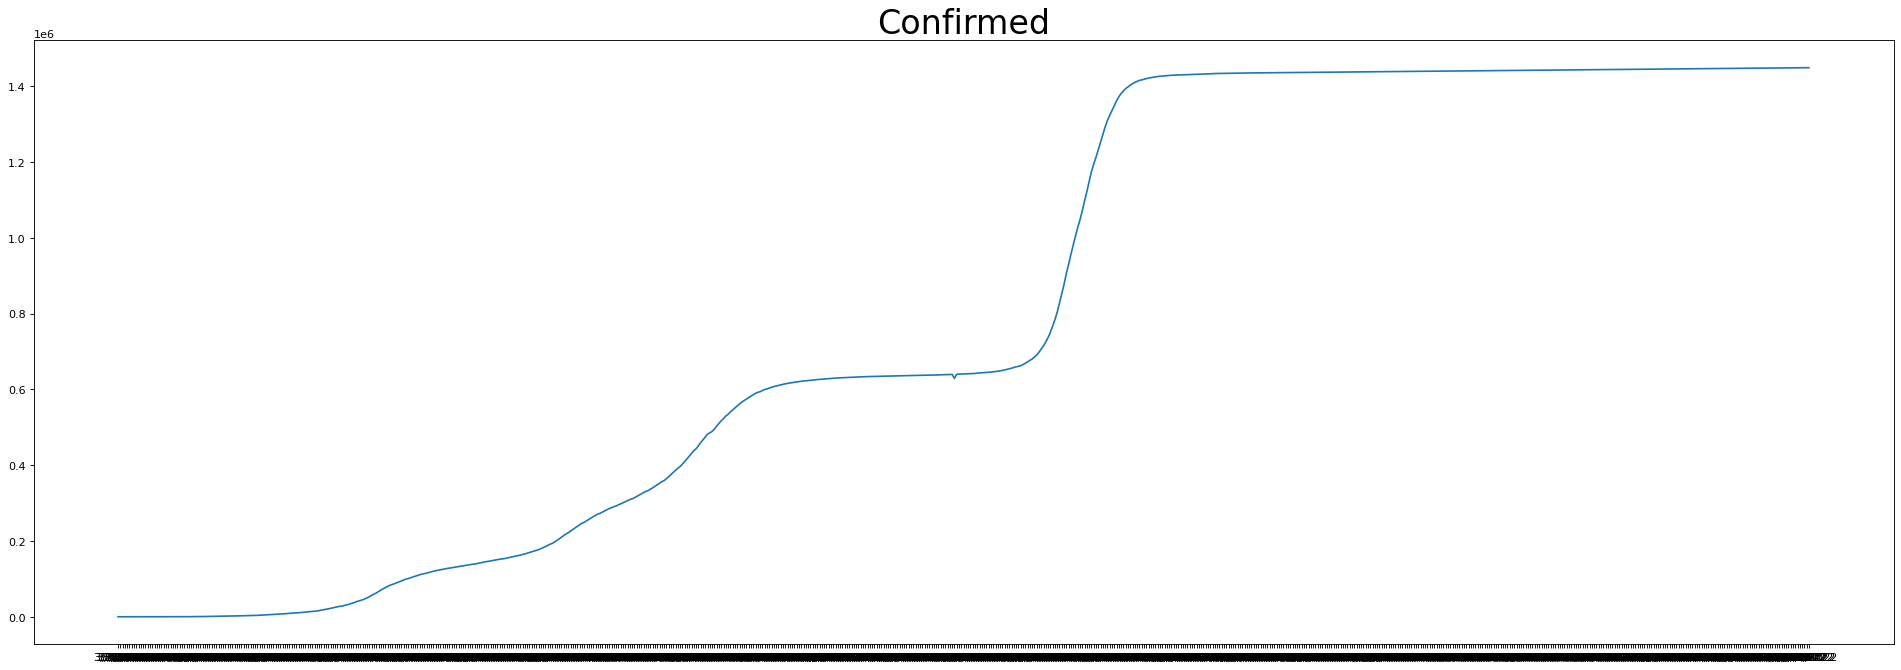

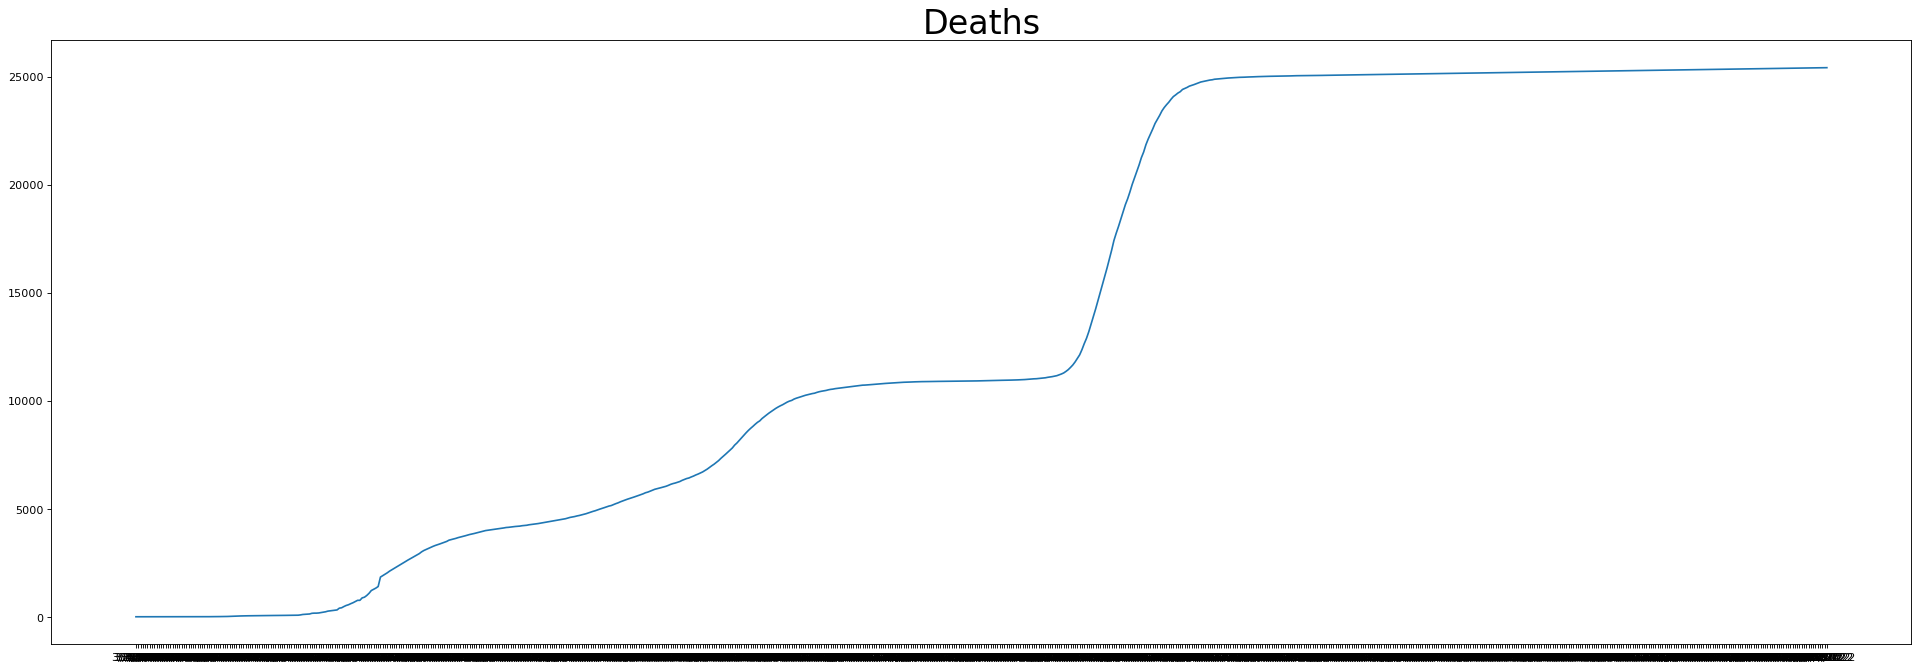

In [19]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Confirmed', fontsize=30)
plt.plot(df.Confirmed)

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Deaths', fontsize=30)
plt.plot(df.Deaths)


# Visualize the Relation of Dataset

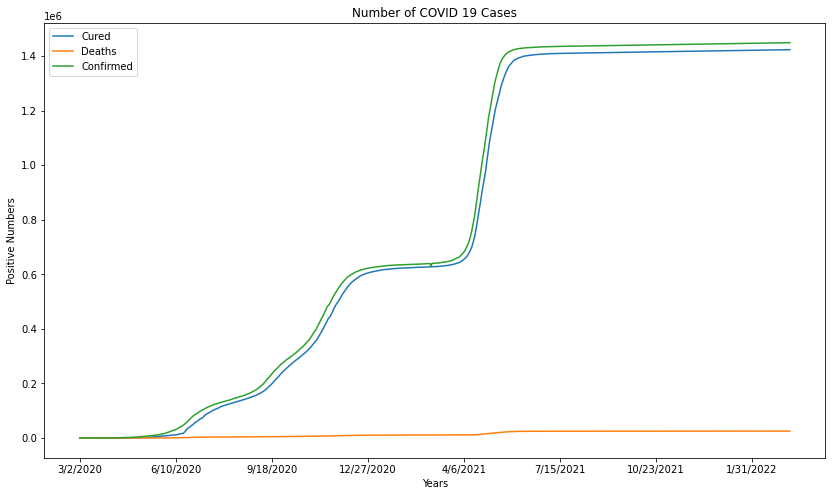

In [20]:
df.plot(kind='line',figsize=(14, 8))

plt.title('Number of COVID 19 Cases')
plt.ylabel('Positive Numbers')
plt.xlabel('Years')
plt.show()

# Practice Area Plot on Dataset

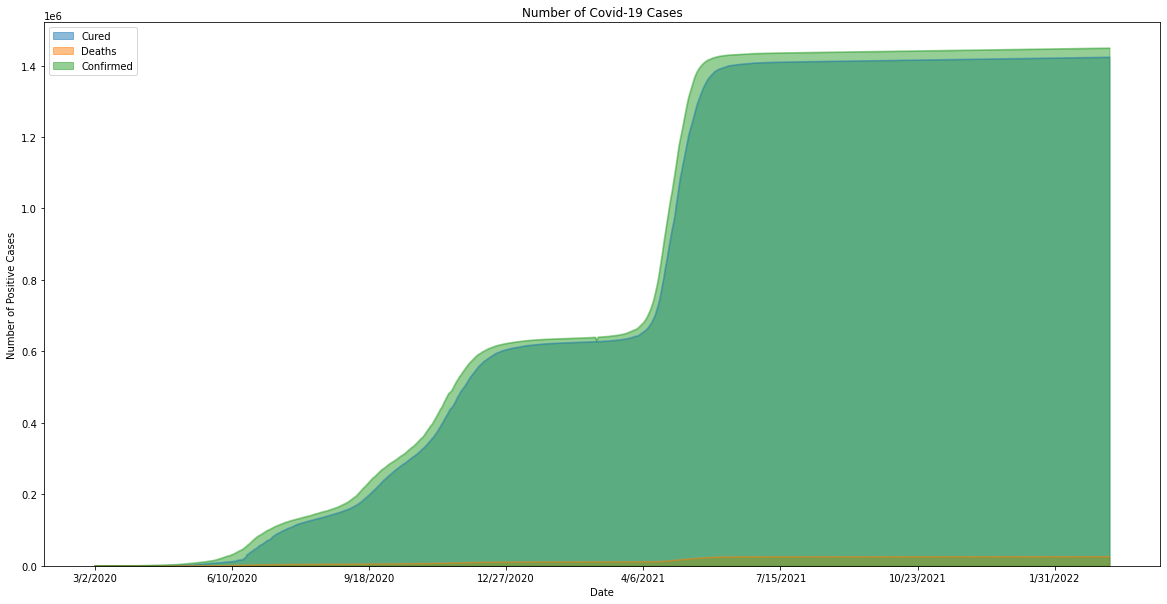

In [21]:
df.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Number of Covid-19 Cases')
plt.ylabel('Number of Positive Cases')
plt.xlabel('Date')

plt.show()

# Plot  AutoCorrelation, Mean over time and Standard Daviation

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plots lags on the horizontal and the correlations on vertical axis.
#Plot the partial autocorrelation function
#we will use plot_pcaf later 


Text(0.5, 1.0, 'Mean over time')

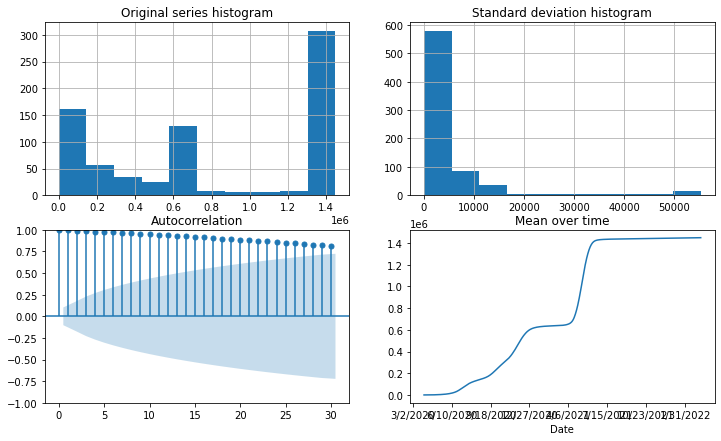

In [23]:
fig = plt.figure(figsize=(12, 7)) #ajust figure parameter
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0)) #obtain four diagrams 
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

df.Confirmed.hist(ax=hist_ax) #draw histogram of pollution_today
hist_ax.set_title("Original series histogram")

series = df.Confirmed[:365]

plot_acf(series, lags=30, ax=ac_ax) #plot the autocorrelation
ac_ax.set_title("Autocorrelation")

mm = df.Confirmed.rolling(7).std() #plot hisogram of std of pollution_today
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = df.Confirmed.rolling(30).mean() #plot the mean of pollution_today with step size 30
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

# Stationarity Check

In [24]:
from statsmodels.tsa.stattools import adfuller
#builtin library for stats model
# The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the 
#presence of serial correlation.

In [25]:
X = df.Confirmed.values #get the list of all the values present in pollution_today
result = adfuller(X) #apply Augmented Dicky-Fuller test
print('ADF Statistic: %f' % result[0]) #print the result of adfuller method
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.981659
p-value: 0.759895
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


# Apply Machine Learning Models for Forecasting

# A- Auto Regression

In [26]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

**Index Datetime for ARIMA Model**

In [27]:
df.index = pd.DatetimeIndex(df.index)
df

,Cured,Deaths,Confirmed
Date,,,
2020-03-02,0.000,0.00000,1.000
2020-03-03,0.000,0.00000,1.000
2020-03-04,0.000,0.00000,1.000
2020-03-05,0.000,0.00000,2.000
2020-03-06,0.000,0.00000,3.000
...,...,...,...
2022-03-08,1423097.143,25405.00000,1448667.714
2022-03-09,1423153.714,25406.60714,1448724.214
2022-03-10,1423210.286,25408.21429,1448780.714


**Split Dataset into Training and Testing**

In [152]:
#lets import the AutoReg model from statsmodel
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm
from utils.metrics import evaluate

In [153]:
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}


split_date = '2021-12-12'
df_training = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

651 days of training data 
 90 days of testing data 


**Train our Model**

In [155]:
##### Walk throught the test data, training and predicting 1 day ahead for all the test data

#Now lets set the take the index as per the length of  

index = len(df_training)
#make a variable
y = list()
#tqdm is a wrapper function that hides the lenght of iterable 
# Using tqdm is very simple, you just need to add your code between tqdm() after importing the library in your code. 
#You need to make sure that the code you put in between the tqdm() function must be iterable or it would not work at all.
for t in tqdm(range(len(df_test.Confirmed))):
    temp_train = df[:len(df_training)+t]
    #We can take lags as per our choice
    model = AutoReg(temp_train.Confirmed, lags=5)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    y = y + [predictions]
# Concatenate pandas objects along a particular axis with optional set logic along the other axes.
#Can also add a layer of hierarchical indexing on the concatenation axis, 
#which may be useful if the labels are the same (or overlapping) on the passed axis number.
y = pd.concat(y)
resultsDict['AutoReg'] = evaluate(df_test.Confirmed, y.values)
predictionsDict['AutoReg'] = y.values

  0%|                                                                                           | 0/90 [00:00<?, ?it/s]C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit in

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit in

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit in

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit in

**Visualize the Forecast**

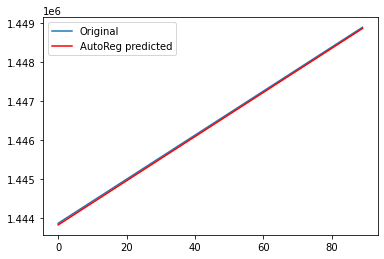

In [156]:
plt.plot(df_test.Confirmed.values, label='Original')
plt.plot(y.values, color='red', label='AutoReg predicted')
plt.legend()

# 2-ARIMA Model

In [28]:
model=ARIMA(df['Confirmed'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  741
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6220.826
Date:                Fri, 02 Sep 2022   AIC                          12447.652
Time:                        11:38:29   BIC                          12461.472
Sample:                    03-02-2020   HQIC                         12452.981
                         - 03-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9907      0.002    453.797      0.000       0.986       0.995
ma.L1         -0.4011      0.009    -42.347      0.000      -0.420      -0.383
sigma2      1.154e+06   1.28e+04     89.908      0.000    1.13e+06    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   7.02   Jarque-Bera (JB):            352430.28
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             4.45
Prob(H) (two-sided):                  0.00   Kurtosis:                       109.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
df

,Cured,Deaths,Confirmed
Date,,,
2020-03-02,0.000,0.00000,1.000
2020-03-03,0.000,0.00000,1.000
2020-03-04,0.000,0.00000,1.000
2020-03-05,0.000,0.00000,2.000
2020-03-06,0.000,0.00000,3.000
...,...,...,...
2022-03-08,1423097.143,25405.00000,1448667.714
2022-03-09,1423153.714,25406.60714,1448724.214
2022-03-10,1423210.286,25408.21429,1448780.714


In [31]:
df = df[~df.index.duplicated()]
df

,Cured,Deaths,Confirmed
Date,,,
2020-03-02,0.000,0.00000,1.000
2020-03-03,0.000,0.00000,1.000
2020-03-04,0.000,0.00000,1.000
2020-03-05,0.000,0.00000,2.000
2020-03-06,0.000,0.00000,3.000
...,...,...,...
2022-03-08,1423097.143,25405.00000,1448667.714
2022-03-09,1423153.714,25406.60714,1448724.214
2022-03-10,1423210.286,25408.21429,1448780.714


<AxesSubplot:xlabel='Date'>

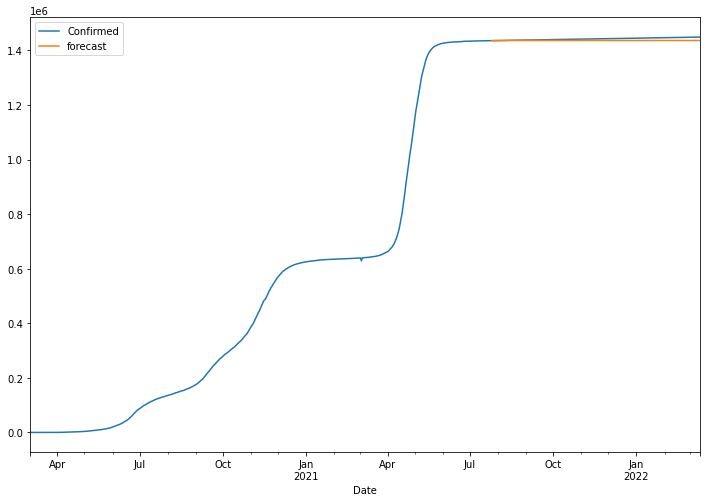

In [91]:
df['forecast']=model_fit.predict(start=510,end=760,dynamic=True)
df[['Confirmed','forecast']].plot(figsize=(12,8))

# 3-SARIMA Model

In [57]:
import statsmodels.api as sm

In [162]:
model=sm.tsa.statespace.SARIMAX(df['Confirmed'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [165]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Confirmed   No. Observations:                  741
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6143.647
Date:                            Fri, 02 Sep 2022   AIC                          12297.294
Time:                                    13:21:16   BIC                          12320.245
Sample:                                03-02-2020   HQIC                         12306.150
                                     - 03-12-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   5.17e-05   1.93e+04      0.000       1.000       1.000
ma.L1         -0.4062      0.010    -42.263      0.000      -0.425      -0.387
ar.S.L12       0.0293      0.026      1.111      0.267      -0.022       0.081
ma.S.L12      -0.9996      0.012    -83.573      0.000      -1.023      -0.976
sigma2      1.184e+06   1.02e-08   1.16e+14      0.000    1.18e+06    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.29   Jarque-Bera (JB):            320063.86
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             4.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       105.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.63e+29. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

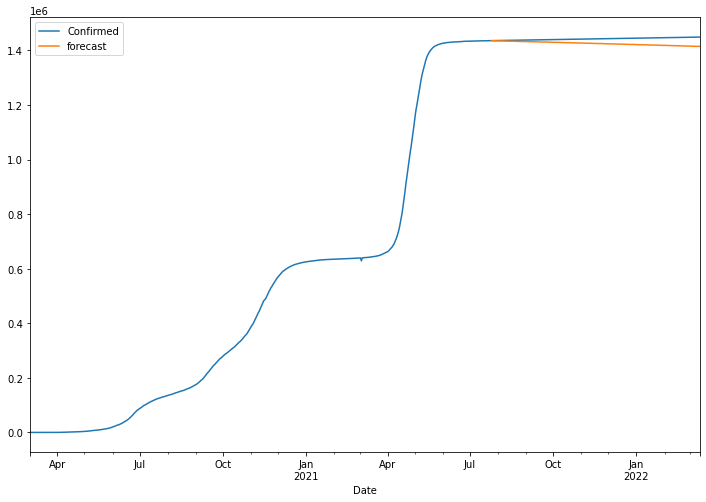

In [164]:
df['forecast']=results.predict(start=510,end=760,dynamic=True)
df[['Confirmed','forecast']].plot(figsize=(12,8))

In [166]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [167]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [168]:
future_df=pd.concat([df,future_datest_df])


<AxesSubplot:>

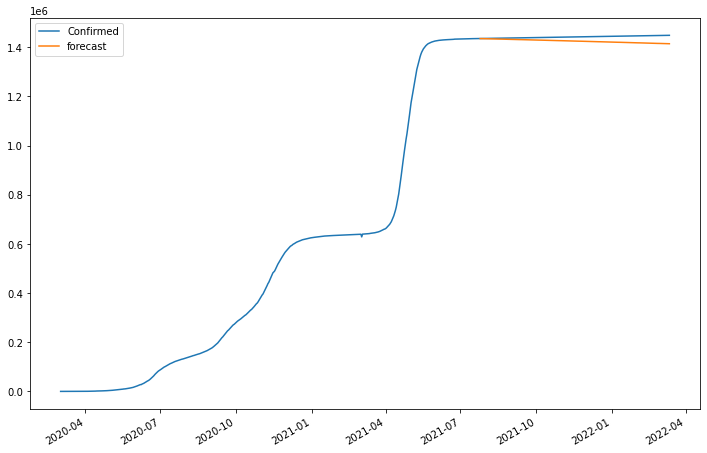

In [169]:
future_df['forecast'] = results.predict(start=510,end=760, dynamic= True)  
future_df[['Confirmed', 'forecast']].plot(figsize=(12, 8)) 

# 4- Variations in SARIMA

In [179]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Confirmed'],order=(2, 1, 1),seasonal_order=(1,1,1,24))
results=model.fit()
results.summary()

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Confirmed   No. Observations:                  741
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -6036.988
Date:                            Fri, 02 Sep 2022   AIC                          12085.975
Time:                                    13:49:43   BIC                          12113.418
Sample:                                03-02-2020   HQIC                         12096.572
                                     - 03-12-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6494      0.032     20.482      0.000       0.587       0.712
ar.L2          0.3382      0.031     11.048      0.000       0.278       0.398
ma.L1         -0.1600      0.033     -4.903      0.000      -0.224      -0.096
ar.S.L24      -0.0872      0.053     -1.649      0.099      -0.191       0.016
ma.S.L24      -0.9972      0.014    -69.492      0.000      -1.025      -0.969
sigma2       1.12e+06   1.36e-08   8.24e+13      0.000    1.12e+06    1.12e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            213210.71
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             3.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        87.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.83e+28. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

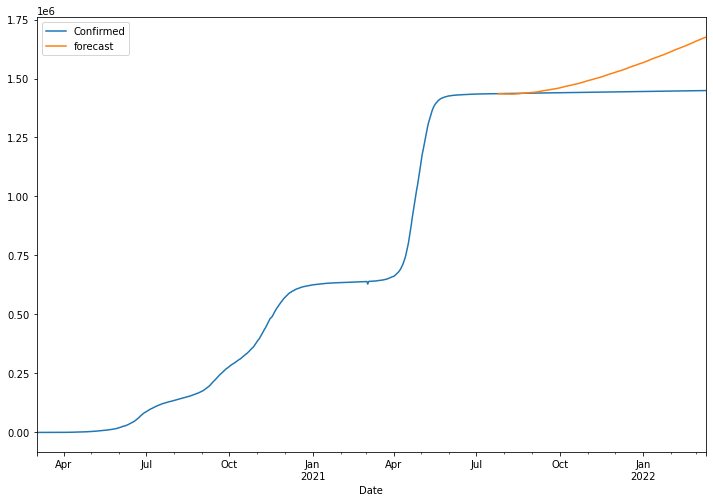

In [180]:
df['forecast']=results.predict(start=510,end=760,dynamic=True)
df[['Confirmed','forecast']].plot(figsize=(12,8))

In [181]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

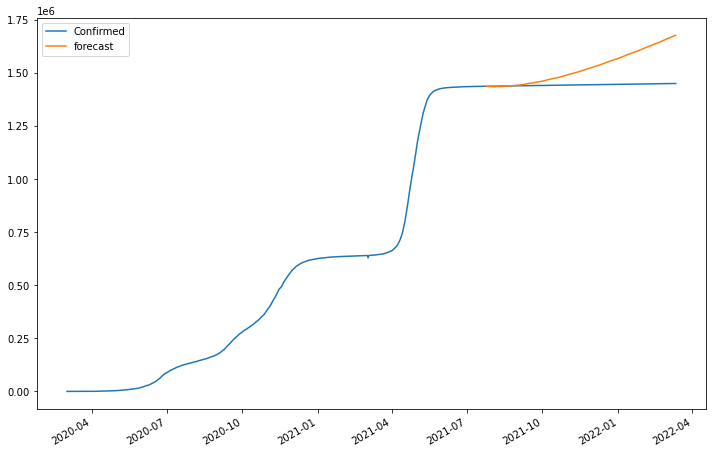

In [182]:
future_df['forecast'] = results.predict(start=510,end=760, dynamic= True)  
future_df[['Confirmed', 'forecast']].plot(figsize=(12, 8))